# Increasing returns, Monopolistic Competition 
# and International Trade

Here is a presentation and simulation of a model of "Increasing Returns to Scale, monopolistic competition and Trade" based on the Krugman (1979) article by the same name in the *Journal of International Economics* with the following simplifications and adaptations:

- model and graph analysis simplified to be similar to Krugman, Obstfeld, Melitz textbook.
- We use the linear demand setup from Salop, S. (1979)  “Monopolistic Competition with Outside Goods,” *Bell Journal of Economics*


This is a jupyter notebook with executable python code for the graphs and simulations. If you want to execute and interact with the content below please first go to the [Code Section](#Code-Section) below, execute the code there and then return. Also, if running on Microsoft azure notebooks 'Change the kernel' to python 3.6.

### Preliminaries

Consider a demand curve of the form:

$$
q_i = A - b \cdot P_i
$$

It's associated inverse demand function will be:
$$
P(q_i) = \frac{A}{b} - \frac{1}{b} \cdot q_i
$$

Total Revenue $\mathit{TR}(q_i) = P(q_i) \cdot q_i$ can be differentiated to find
$$
\mathit{MR}(q_i) = \frac{A}{b} - \frac{2}{b} \cdot q_i =  P - \frac{1}{b} \cdot q_i
$$
 

and we can find an expression for the gap 
$$
P(q_i) - \mathit{MR}(q_i) = \frac{q_i}{b}
$$

This is also the firm's **markup over marginal cost** $P-\mathit{MC}$  (since $\mathit{MR=MC}$).  

Note the larger is $b$ the more firm sales fall for a given price rise (i.e. the more elastic is demand).

### Firm Technology and Costs

Each firm has exclusive right to produce a unique product (protected by patent or copyright) but competitors can enter the market to supply similar goods. There is a relatively high fixed cost of establishing a production plant and then a simple constant marginal cost:

$$
TC(q_i) = F + c \cdot q_i
$$

hence $\mathit{MC}(q_i) = c$ and average cost is
$$
AC(q_i) = \frac{F}{q_i} + c
$$

### Demand for Product Variety

Consumers demand variety. Products are symmetric substitutes in consumption. Salop (1979) constructs a model with linear demands

assume symmetric demand for each good.  Demand for firm $i$'s good is:

$$
q_i = S \cdot \left [\frac{1}{n} -b \cdot (P_i- \bar P)     \right ]
$$

Here $S$ is total output in the industry.  If firm sets product price $P_i$ equal to price of other similar products $P$ then firm will produce $q_i = \frac{S}{n}$ of total output.  If it tries to raise $P_i>P$ it loses some but not all market share.

Expanding out the earlier inverse demand equation:

$$
q_i = \left [\frac{S}{n} + b\bar P  S \right ] - b P S
$$

which we can invert to get an inverse demand curve for each firm.

Monopolistically competitive market with entry will drive $P=AC$ and hence profits to zero.

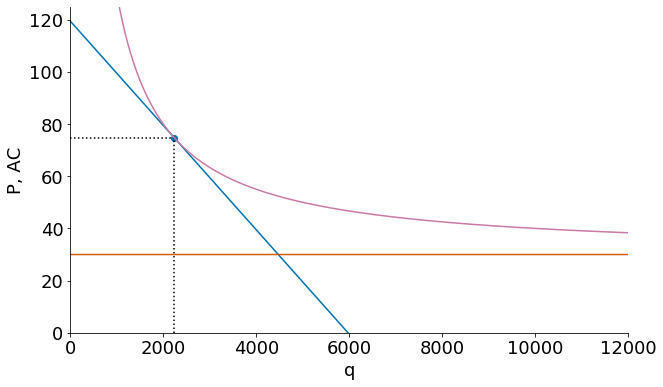

In [23]:
firm(S=S/20, F=F, c=c)

## Solving for equilibrium $n$ and $\bar P$

In a symmetric equilibrium $P_i = \bar P$ then  $q_i = q = \frac{S}{n}$ or $S = n \cdot q$


$$
q_i = \left [\frac{S}{n} + b\bar P \right ] - S b P
$$

### The `cc` curve

Average cost AC rises with the number of firms  𝑛 , because more firms in the same market means lower production runs and higher average fixed costs.

Substiting $q = \frac{S}{n}$ into $AC = \frac{F}{q} + c$

$$
AC = \frac{nF}{S} + c
$$

Average cost rises with the number of firms $n$ because each firm produces less $\frac{S}{n}$ and so each firm is spreading their fixed costs over 

### The `pp` curve

Price falls with the number of firms  𝑛  because increased competition reduces markups.


In a symmetric equilibrium firm demand could be written
$$
q_i = \left [\frac{S}{n} + b\bar P \right ] - S b P  \\
q_i = A^\prime - b^\prime P 
$$


Recall that with a demand curve of form $q_i = A^\prime - b^\prime \cdot P$ we found a markup

$$
P = c + \frac{q}{b^\prime} 
$$

Substituting using $b^\prime = S\cdot b$, and $q=\frac{S}{n}$ we get:

$$
P = c + \frac{1}{b \cdot n}
$$


n = 100, P= 40, q = 10000, F/q =  10


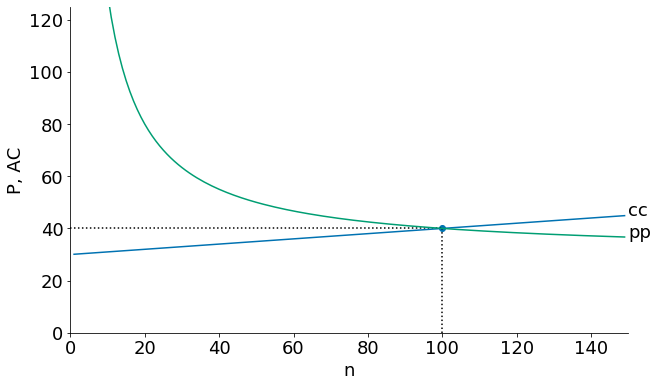

In [24]:
mkt_eq()

In [25]:
interact(mkt_eq, S=(50*1000, 2000*1000,50*1000), F=fixed(F), c=fixed(c) );

interactive(children=(IntSlider(value=1000000, description='S', max=2000000, min=50000, step=50000), Output())…

n = 100, P= 40, q = 10000, F/q =  10


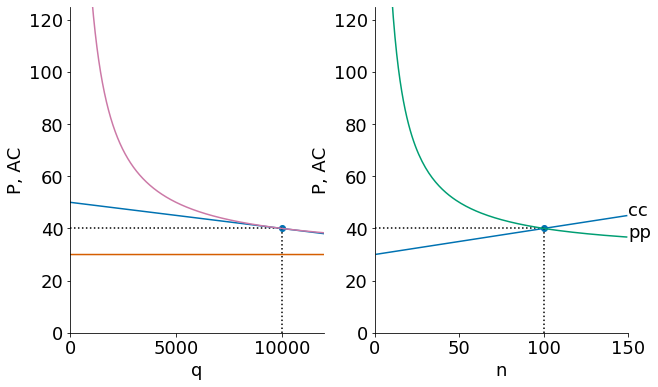

In [26]:
twopane(S,F,c);

In [27]:
interact(twopane, S=(50*1000, 2000*1000,50*1000), F=fixed(F), c=fixed(c) );

interactive(children=(IntSlider(value=1000000, description='S', max=2000000, min=50000, step=50000), Output())…

Done

### Code Section

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn as sns


In [3]:
plt.style.use('seaborn-colorblind')
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid']=False

In [4]:
A = 100000
b = 1/1000
F = 100*1000
c = 30
S = 1*1000*1000
qmax = 100
nmax = 50
q = np.arange(1,qmax)
n = np.arange(1,nmax)

In [5]:
def p(q, A=A, b = b):
    return A/b - (1/b) * q

In [6]:
def mr(q, A=A, b = b):
    return A/b - (2/b) * q

In [7]:
def AC(q, F=F, c = c):
    return F/q + c

In [8]:
def mc(q, c = c):
    return c*np.ones(len(q))

In [9]:
def cc(n, S=S, F=F, c = c):
    return n*F/S + c

In [10]:
def pp(n, b=b,  c = c):
    return c + 1/(b*n)

In [20]:
def firm(S =S, F=F, c=c):
    qmax = 15000
    ne = np.sqrt(S/(b*F))
    Pe = c + np.sqrt(F/(S*b))
    qe = S/ne
    q = np.arange(1,qmax)
    plt.xlim(0,12000)
    plt.ylim(0,125)
    plt.plot(q, p(q, A=(S/ne+b*S*Pe), b = b*S))
    plt.plot(q, mr(q, A, b))
    plt.plot(q, mc(q, c))
    plt.xlabel('q')
    plt.ylabel('P, AC')
    
    plt.plot(q, AC(q, F, c))
    plt.scatter(qe,AC(qe,F,c))
    plt.vlines(qe,0,Pe, linestyle=":")
    plt.hlines(Pe,0,qe, linestyle=":");

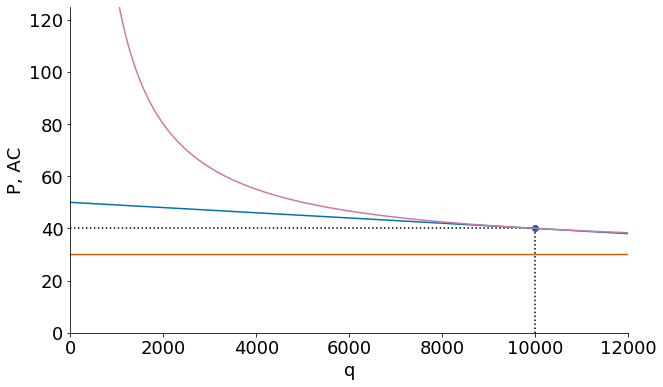

In [21]:
firm(S=S, F=F, c=c)

In [22]:
interact(firm, S=(50*1000, 2000*1000,50*1000), F=fixed(F), c=fixed(c));

interactive(children=(IntSlider(value=1000000, description='S', max=2000000, min=50000, step=50000), Output())…

In [14]:
def mkt_eq(S = S, F=F, c=c):
    nmax = 150
    n = np.arange(1,nmax)
    ne = np.sqrt(S/(b*F))
    Pe = c + np.sqrt(F/(S*b))
    AC = c + ne*F/S
    print(f"n = {ne:2.0f}, P={Pe:3.0f}, q = {S/ne:5.0f}, F/q = {ne*F/S:3.0f}")
    plt.xlim(0,150)
    plt.ylim(0,125)
    plt.xlabel('n')
    plt.ylabel('P, AC')
    plt.plot(n, cc(n, S=S, F=F, c = c))
    plt.plot(n, pp(n, b=b,  c = c))
    plt.text(nmax,pp(nmax),"pp")
    ntop = (100-c)*S/F
    plt.text(min(nmax,ntop), cc(min(ntop,nmax),S=S, F=F, c = c), "cc") 
    plt.scatter(ne,Pe)
    plt.hlines(Pe,0,ne,linestyle=":")
    plt.vlines(ne,0,Pe,linestyle=":")

n = 100, P= 40, q = 10000, F/q =  10


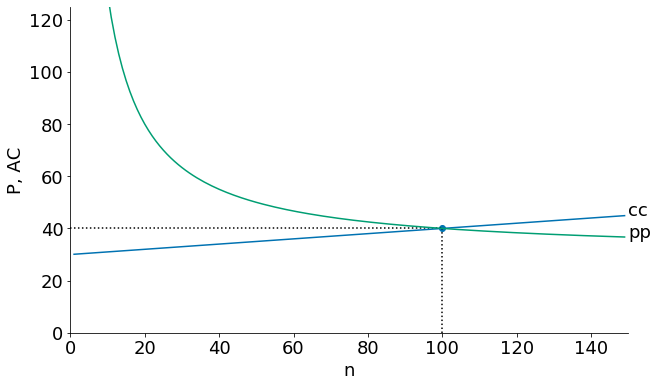

In [15]:
mkt_eq()

In [16]:
interact(mkt_eq, S=(50*1000, 2000*1000,50*1000), F=fixed(F), c=fixed(c) )

interactive(children=(IntSlider(value=1000000, description='S', max=2000000, min=50000, step=50000), Output())…

<function __main__.mkt_eq(S=1000000, F=100000, c=30)>

In [17]:
def twopane(S, F, c):
    plt.figure()
    ax = plt.subplot(121)
    firm(S,F,c)
    ax= plt.subplot(122)
    mkt_eq(S,F,c);

n = 100, P= 40, q = 10000, F/q =  10


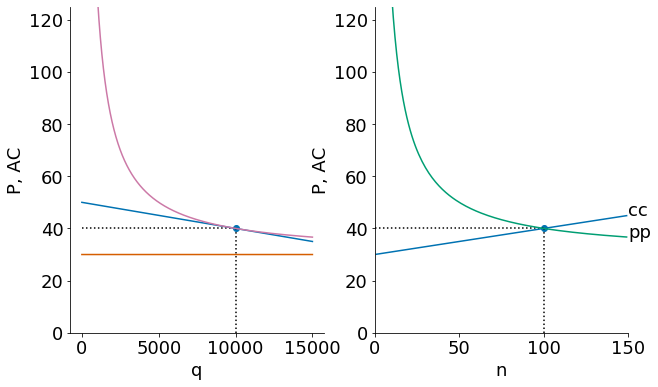

In [18]:
twopane(S,F,c)